In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:

pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

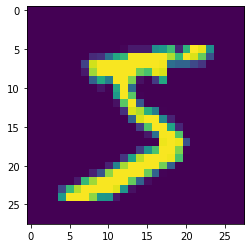

In [6]:
plt.imshow(train_digits[0])

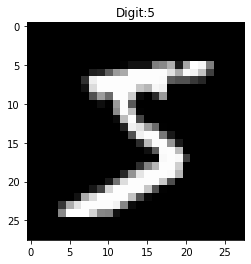

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

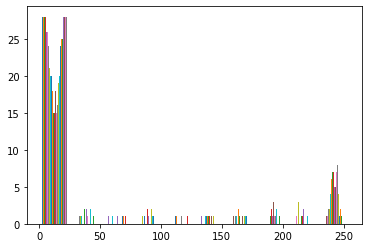

In [8]:
plt.hist(train_digits[0])
plt.show()

In [38]:
abc=np.random.randint(train_digits.shape[0],size=16)
abc

array([44176, 32680, 22966, 50324, 37286, 11243,  9935, 15090, 15170,
       46928, 41556, 35003,  4248, 57363, 50648, 47075])

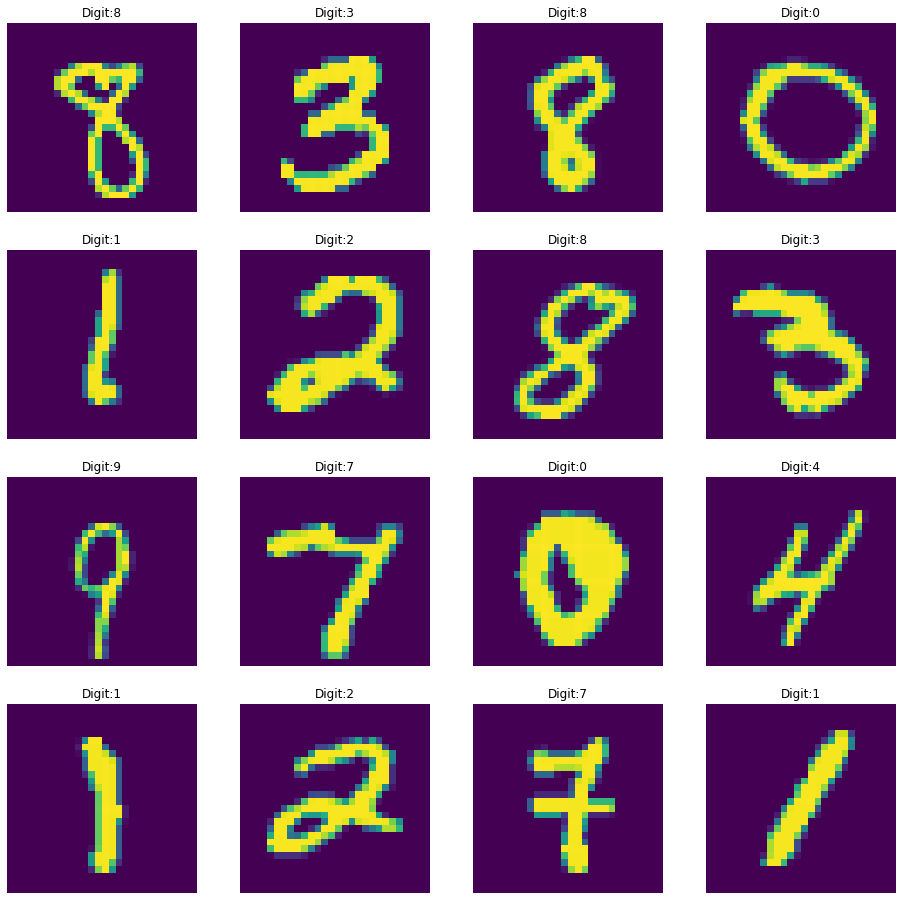

In [39]:
plt.figure(figsize=(16,16))
j=1
for i in abc:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [13]:
from keras.utils import to_categorical

In [14]:
train_labels_cat=to_categorical(train_labels)
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 118us/step - loss: 0.2432 - accuracy: 0.9264 - val_loss: 0.1768 - val_accuracy: 0.9482
Epoch 2/5
54000/54000 [==============================] - 6s 110us/step - loss: 0.1117 - accuracy: 0.9659 - val_loss: 0.1029 - val_accuracy: 0.9705
Epoch 3/5
54000/54000 [==============================] - 6s 110us/step - loss: 0.0791 - accuracy: 0.9758 - val_loss: 0.1130 - val_accuracy: 0.9693
Epoch 4/5
54000/54000 [==============================] - 6s 112us/step - loss: 0.0667 - accuracy: 0.9796 - val_loss: 0.0998 - val_accuracy: 0.9727
Epoch 5/5
54000/54000 [==============================] - 6s 112us/step - loss: 0.0533 - accuracy: 0.9831 - val_loss: 0.1090 - val_accuracy: 0.9705


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.10208441555775062, 0.9717000126838684]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.8495903e-10, 1.2622344e-06, 4.2725114e-06, 1.1150216e-05,
        1.5221350e-07, 1.9937497e-07, 3.5247912e-11, 9.9995434e-01,
        2.7959661e-07, 2.8380144e-05]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[5.84959026e-10, 1.26223313e-06, 4.27251143e-06, 1.11502377e-05,
        1.52213360e-07, 1.99374966e-07, 3.52479122e-11, 9.99954343e-01,
        2.79596605e-07, 2.83801437e-05],
       [4.51139837e-09, 2.50316532e-07, 9.99998927e-01, 1.43688146e-08,
        6.18114587e-11, 2.10750839e-09, 9.27249832e-09, 8.20847106e-07,
        2.10421174e-08, 1.96952724e-13],
       [6.90278696e-08, 9.99979615e-01, 1.98727844e-06, 1.17893810e-08,
        1.55993760e-07, 5.27930524e-07, 8.69197493e-07, 6.72413989e-06,
        9.94583479e-06, 5.79285135e-08],
       [9.99940634e-01, 1.05782494e-08, 3.78548680e-06, 2.07761829e-07,
        7.63813932e-06, 1.54032591e-06, 2.68378585e-07, 1.50876396e-08,
        1.60195370e-07, 4.57818351e-05],
       [2.31584536e-07, 5.60522039e-07, 4.74238988e-07, 9.43456158e-09,
        9.99221563e-01, 1.81049970e-07, 1.72686285e-07, 2.44420062e-06,
        2.28425520e-07, 7.74190179e-04],
       [2.26170505e-09, 9.99997616e-01, 8.40312993e-08, 3.49223483e-10,
   

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.8495903e-10, 1.2622344e-06, 4.2725114e-06, 1.1150216e-05,
        1.5221350e-07, 1.9937497e-07, 3.5247912e-11, 9.9995434e-01,
        2.7959661e-07, 2.8380144e-05]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.92635185, 0.96585184, 0.97575927, 0.9795926, 0.98305553],
 'loss': [0.24320133985165093,
  0.11165647255718984,
  0.07913933930611583,
  0.06666828903728338,
  0.05333217274901647],
 'val_accuracy': [0.9481666684150696,
  0.9704999923706055,
  0.9693333506584167,
  0.9726666808128357,
  0.9704999923706055],
 'val_loss': [0.17675640598436196,
  0.10288137994334101,
  0.11299317859175305,
  0.09977846835243205,
  0.10902210824688276]}

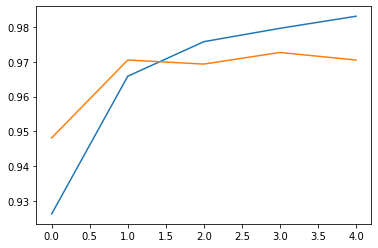

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()

model1.add(Flatten(input_shape=(28,28)))

model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.2552 - accuracy: 0.9219 - val_loss: 0.1224 - val_accuracy: 0.9650
Epoch 2/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.1137 - accuracy: 0.9660 - val_loss: 0.1222 - val_accuracy: 0.9662
Epoch 3/5
54000/54000 [==============================] - 7s 125us/step - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.0950 - val_accuracy: 0.9730
Epoch 4/5
54000/54000 [==============================] - 7s 128us/step - loss: 0.0636 - accuracy: 0.9807 - val_loss: 0.1108 - val_accuracy: 0.9692
Epoch 5/5
54000/54000 [==============================] - 7s 126us/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0928 - val_accuracy: 0.9753


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 30us/step


[0.09006112991549307, 0.9757999777793884]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.8495903e-10, 1.2622344e-06, 4.2725114e-06, 1.1150216e-05,
        1.5221350e-07, 1.9937497e-07, 3.5247912e-11, 9.9995434e-01,
        2.7959661e-07, 2.8380144e-05]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[5.84959026e-10, 1.26223313e-06, 4.27251143e-06, 1.11502377e-05,
        1.52213360e-07, 1.99374966e-07, 3.52479122e-11, 9.99954343e-01,
        2.79596605e-07, 2.83801437e-05],
       [4.51139837e-09, 2.50316532e-07, 9.99998927e-01, 1.43688146e-08,
        6.18114587e-11, 2.10750839e-09, 9.27249832e-09, 8.20847106e-07,
        2.10421174e-08, 1.96952724e-13],
       [6.90278696e-08, 9.99979615e-01, 1.98727844e-06, 1.17893810e-08,
        1.55993760e-07, 5.27930524e-07, 8.69197493e-07, 6.72413989e-06,
        9.94583479e-06, 5.79285135e-08],
       [9.99940634e-01, 1.05782494e-08, 3.78548680e-06, 2.07761829e-07,
        7.63813932e-06, 1.54032591e-06, 2.68378585e-07, 1.50876396e-08,
        1.60195370e-07, 4.57818351e-05],
       [2.31584536e-07, 5.60522039e-07, 4.74238988e-07, 9.43456158e-09,
        9.99221563e-01, 1.81049970e-07, 1.72686285e-07, 2.44420062e-06,
        2.28425520e-07, 7.74190179e-04],
       [2.26170505e-09, 9.99997616e-01, 8.40312993e-08, 3.49223483e-10,
   

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.8495903e-10, 1.2622344e-06, 4.2725114e-06, 1.1150216e-05,
        1.5221350e-07, 1.9937497e-07, 3.5247912e-11, 9.9995434e-01,
        2.7959661e-07, 2.8380144e-05]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.92187035, 0.96603703, 0.97535187, 0.98066664, 0.9835],
 'loss': [0.2551511451502641,
  0.11366946522332728,
  0.08090909442509076,
  0.0636093741199519,
  0.05299846180952671],
 'val_accuracy': [0.9649999737739563,
  0.9661666750907898,
  0.9729999899864197,
  0.9691666960716248,
  0.9753333330154419],
 'val_loss': [0.1224032332499822,
  0.12220620758086442,
  0.09496978821915884,
  0.110781643493101,
  0.09283274474864205]}

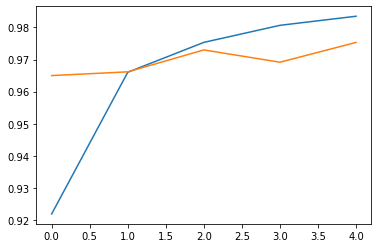

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])